# Numerical Comparisons

This page contains information to reproduce the numerical comparisons made in SuSiE manuscript. Note that the DSC benchmark has to be completed at this stage. 
Please [follow these instructions](../DSC.html) to run the DSC benchmark for SuSiE fine-mapping applications. The benchmark is computationally intensive due to some of the methods compared. 
If you do not want to rerun the benchmark yourself but only to reproduce our comparison figure and tables, you can [download the data here](https://shiny.stephenslab.uchicago.edu/html/). Data file directory should look like:

```
.
├── hard_case
├── susie_comparison
```

In [1]:
%revisions -s -n 10

Revision,Author,Date,Message
2de54a2,Gao Wang,2018-08-17,Add speed comparison table
85c2562,Gao Wang,2018-08-16,Convert two tables to plots
c5f344a,Gao Wang,2018-08-16,Numerical results all figures / tables


## Figure 1: PIP calibration

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb cali_pip
```

### Result

%preview susie_comparison/PIP_comparison_0722.calibrated.estvar_true.png

> susie_comparison/PIP_comparison_0722.calibrated.estvar_true.png (296.5 KiB):

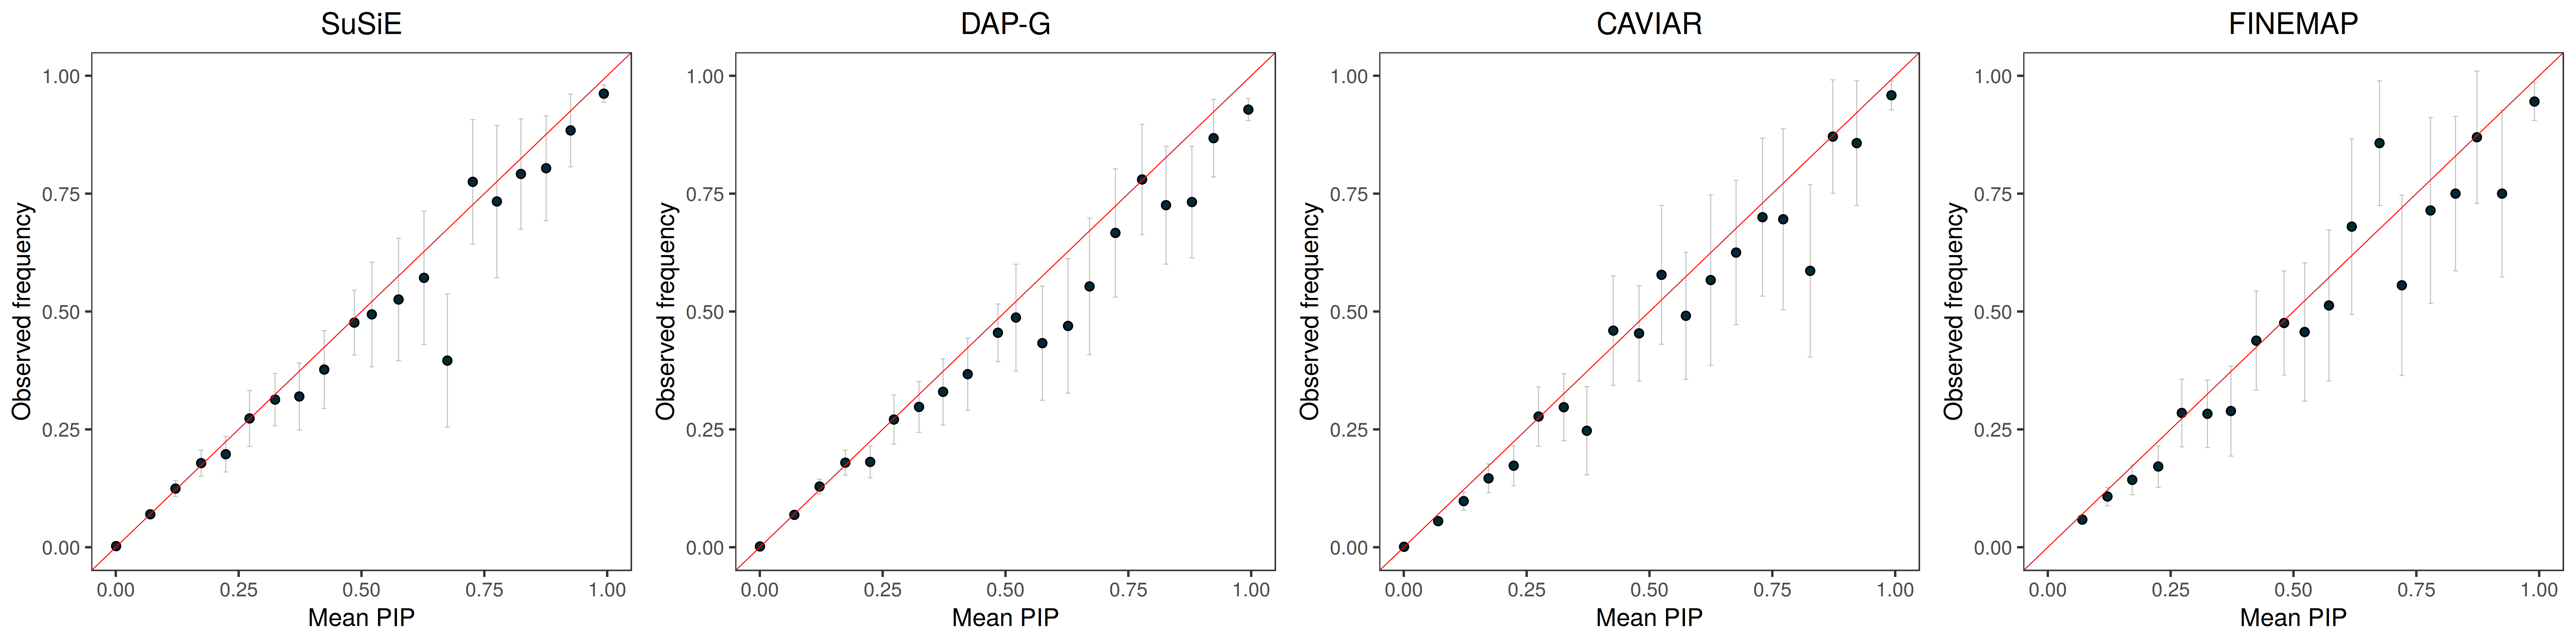

In [2]:
%preview susie_comparison/PIP_comparison_0722.calibrated.estvar_true.png

## Figure 2: Variable level power comparison

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb roc
```

### Result

%preview susie_comparison/ROC_0722.png

> susie_comparison/ROC_0722.png (480.6 KiB):

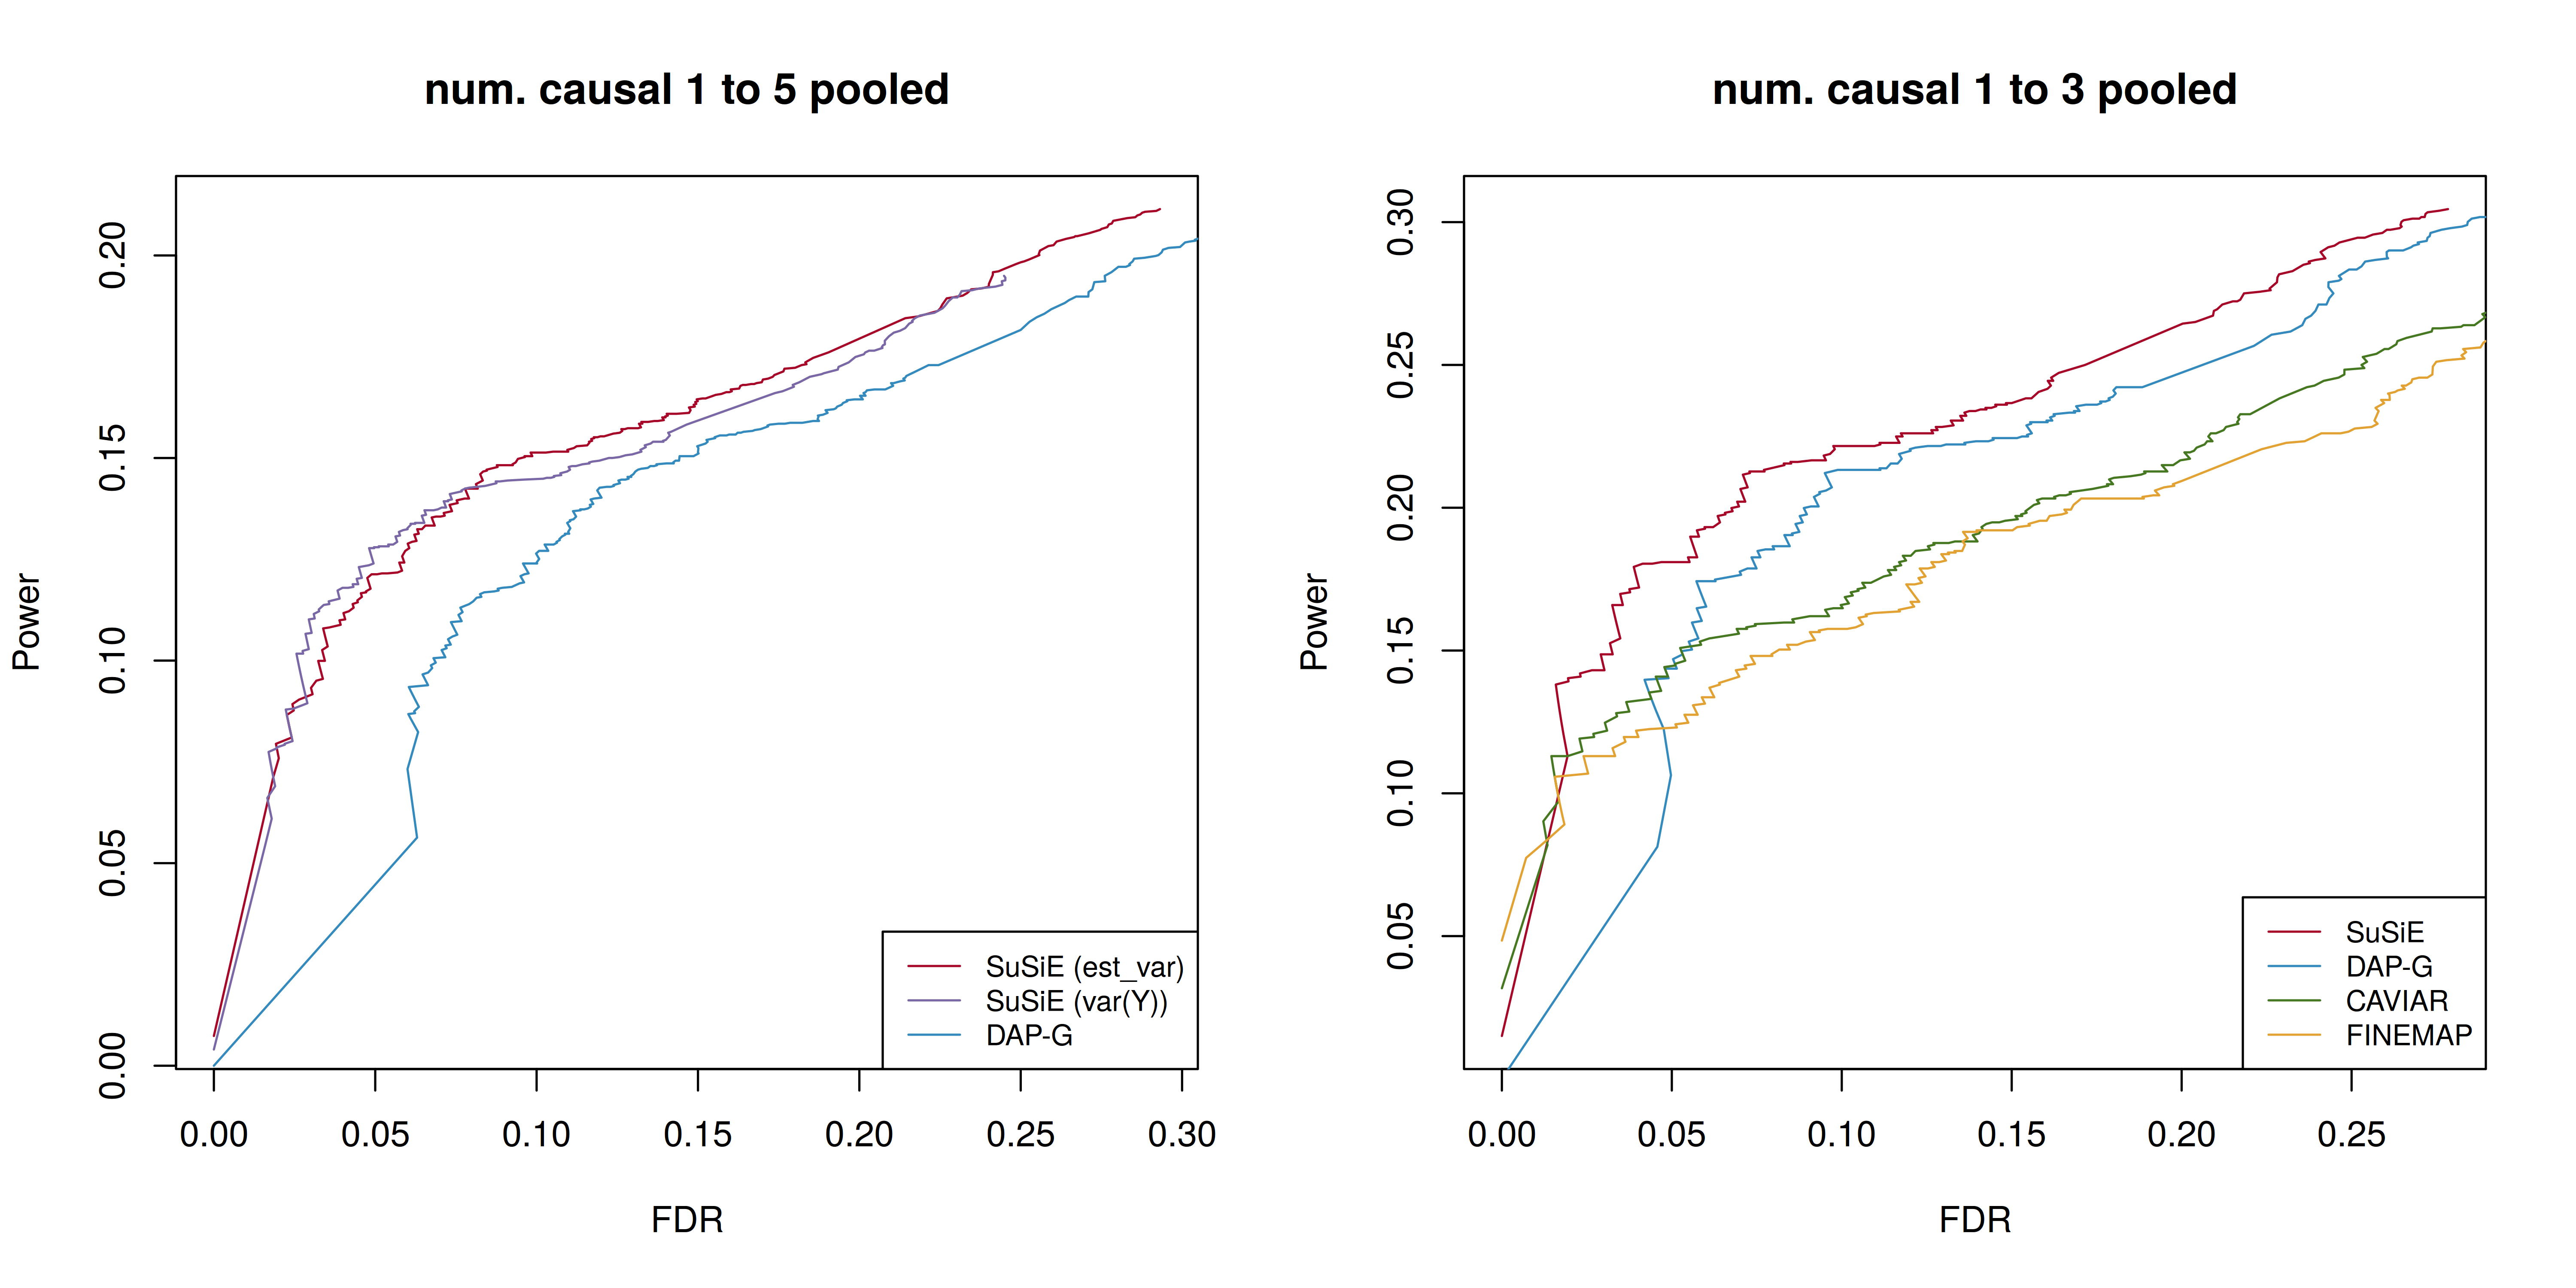

In [3]:
%preview susie_comparison/ROC_0722.png

## Figure 3: "Purity" distribution

### Command

```
sos run analysis/20180620_Purity_Plot_Lite.ipynb purity
```

### Result

%preview susie_comparison/hist_0722.png

> susie_comparison/hist_0722.png (10.5 KiB):

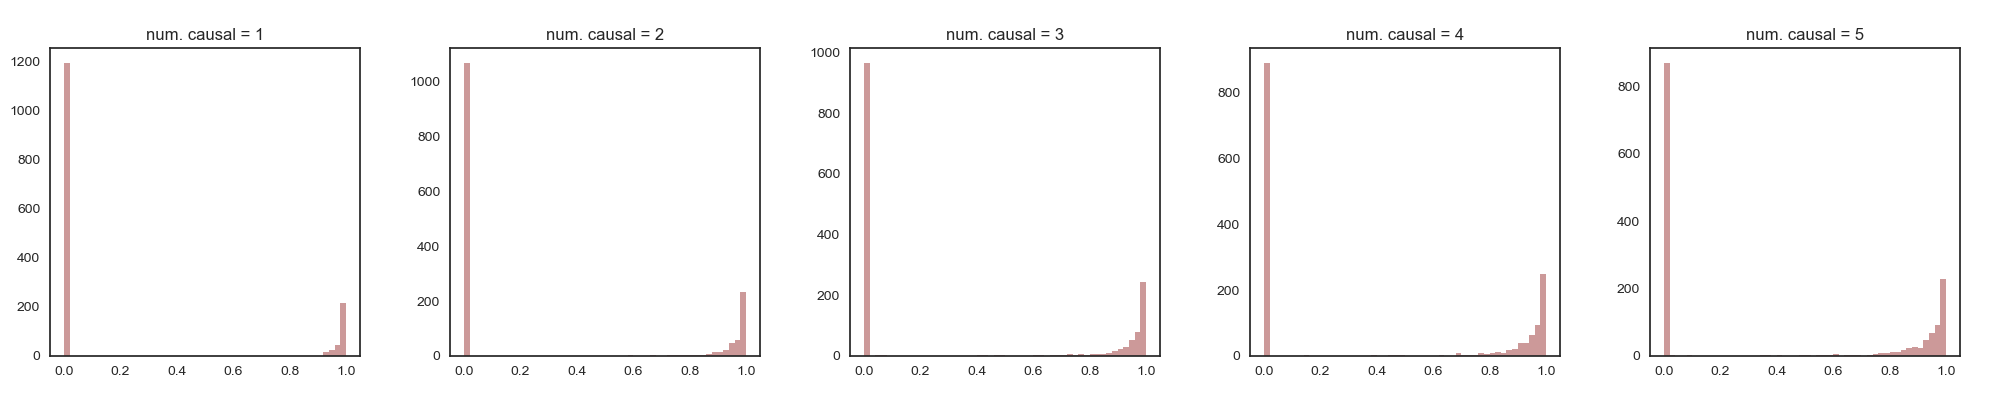

In [4]:
%preview susie_comparison/hist_0722.png

## Figure S4: Purity vs size illustration

%preview susie_comparison/purity_0722/7.png

> susie_comparison/purity_0722/7.png (346.8 KiB):

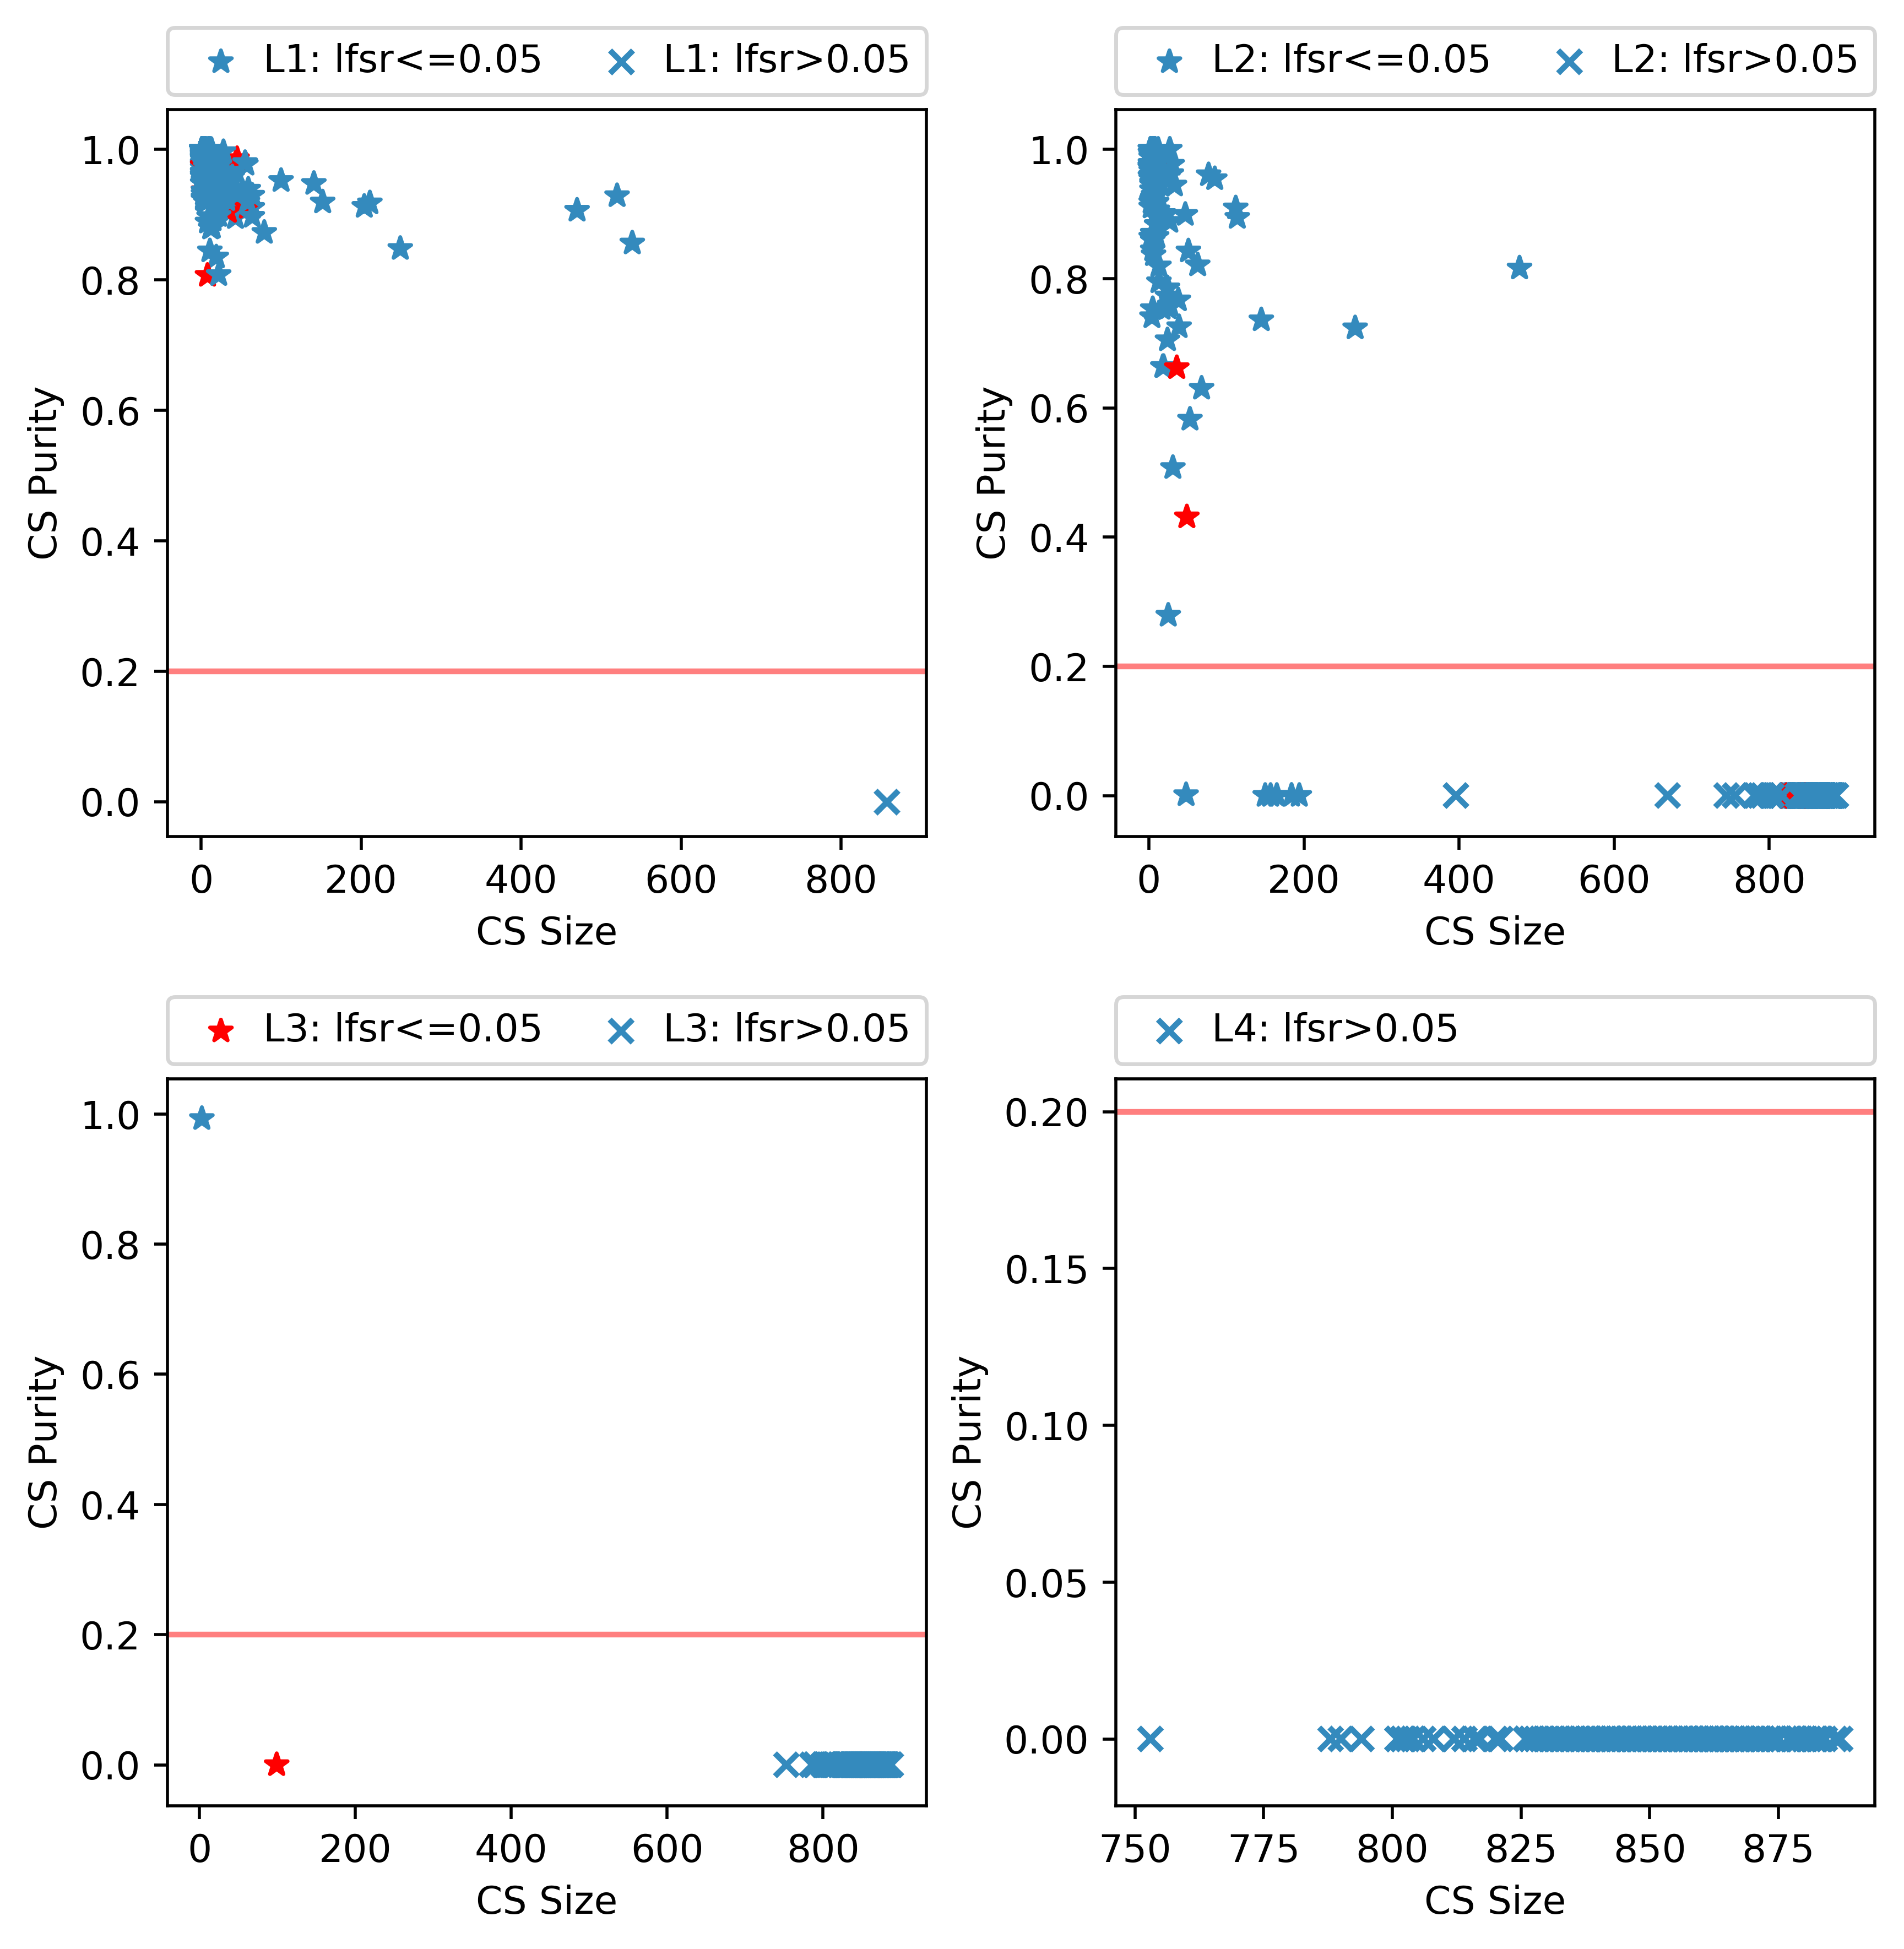

In [5]:
%preview susie_comparison/purity_0722/7.png

## Figure 4: Power comparisons of confidence sets

For "simple case" simulation, number of causal is 1~5 out of 1000 non-causal variants; for the "hard case" number of causal is 10 out of 3000~8000 non-causal variants.

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb power
sos run analysis/20180615_Power_DAP.ipynb power
```

### Result

In [6]:
%run
[cs_eval_1]
quantities = [('power', 'power'), ('fdp', 'false discovery porportion'), ('median_size', 'median size'), ('avg_ld', 'average r2')]
input: for_each = 'quantities', concurrent = True
output: f'susie_comparison/cs_eval/{_quantities[0]}.png'
R: expand = "${ }", stderr = False, stdout = False
    d1 = readRDS('susie_comparison/Power_comparison_0722_cluster_prob_estvar_true.rds')
    d2 = readRDS('hard_case/DAP_comparison_0801_cluster_prob_estvar_true.rds')
    dat = rbind(d1,d2)
    dat$susie_power_se = sqrt(dat$susie_power * (1-dat$susie_power) / dat$expected_discoveries)
    dat$dap_power_se = sqrt(dat$dap_power * (1-dat$dap_power) / dat$expected_discoveries)
    dat$susie_fdp_se = sqrt(dat$susie_fdp * (1-dat$susie_fdp) / dat$susie_discoveries)
    dat$dap_fdp_se = sqrt(dat$dap_fdp * (1-dat$dap_fdp) / dat$dap_discoveries)
    susie = cbind(dat[,c("n_signal", "expected_discoveries", "susie_power", "susie_fdp", "susie_power_se", "susie_fdp_se", "susie_median_size", "susie_avg_ld")], "SuSiE")
    colnames(susie) = c("n_signal", "expected_discoveries", "power", "fdp", "power_se", "fdp_se", "median_size", "avg_ld", "Method")
    dap = cbind(dat[,c("n_signal", "expected_discoveries", "dap_power", "dap_fdp", "dap_power_se", "dap_fdp_se", "dap_median_size", "dap_avg_ld")], "DAP-G")
    colnames(dap) = c("n_signal", "expected_discoveries", "power", "fdp", "power_se", "fdp_se", "median_size", "avg_ld", "Method")
    dat = rbind(susie, dap)
    dat$n_signal = as.factor(dat$n_signal)  
    library(ggplot2)
    png(${_output:r}, 6, 6, units = 'in', res = 500)
    p <- ggplot(dat, aes(x=n_signal, y=${_quantities[0]}, fill=Method)) + 
        geom_bar(stat="identity", position=position_dodge()) +
        ${("geom_errorbar(aes(ymin=%s-%s_se, ymax=%s+%s_se), width=.2, position=position_dodge(.9)) +" % ((_quantities[0],) * 4)) if _quantities[0] in ["power", "fdp"] else ""}
        scale_fill_manual("Method", values = c("DAP-G" = "#348ABD", "SuSiE" = "#A60628")) + 
        labs(x = "num. causal", y = "${_quantities[1]}") + 
        theme_minimal()
    print(p)
    dev.off()

[cs_eval_2]
output: f'susie_comparison/cs_eval/cs_comparison.png'
bash: expand = True
    convert \( {_input[0]} {_input[1]} +append \) \
    \(  {_input[2]} {_input[3]} +append \) -append {_output}

INFO: cs_eval_2 (index=0) is ignored due to saved signature

INFO: Workflow cs_eval (ID=971e590e8b473c66) is ignored with 2 ignored steps and 5 ignored substeps.

%preview susie_comparison/cs_eval/cs_comparison.png

> susie_comparison/cs_eval/cs_comparison.png (296.7 KiB):

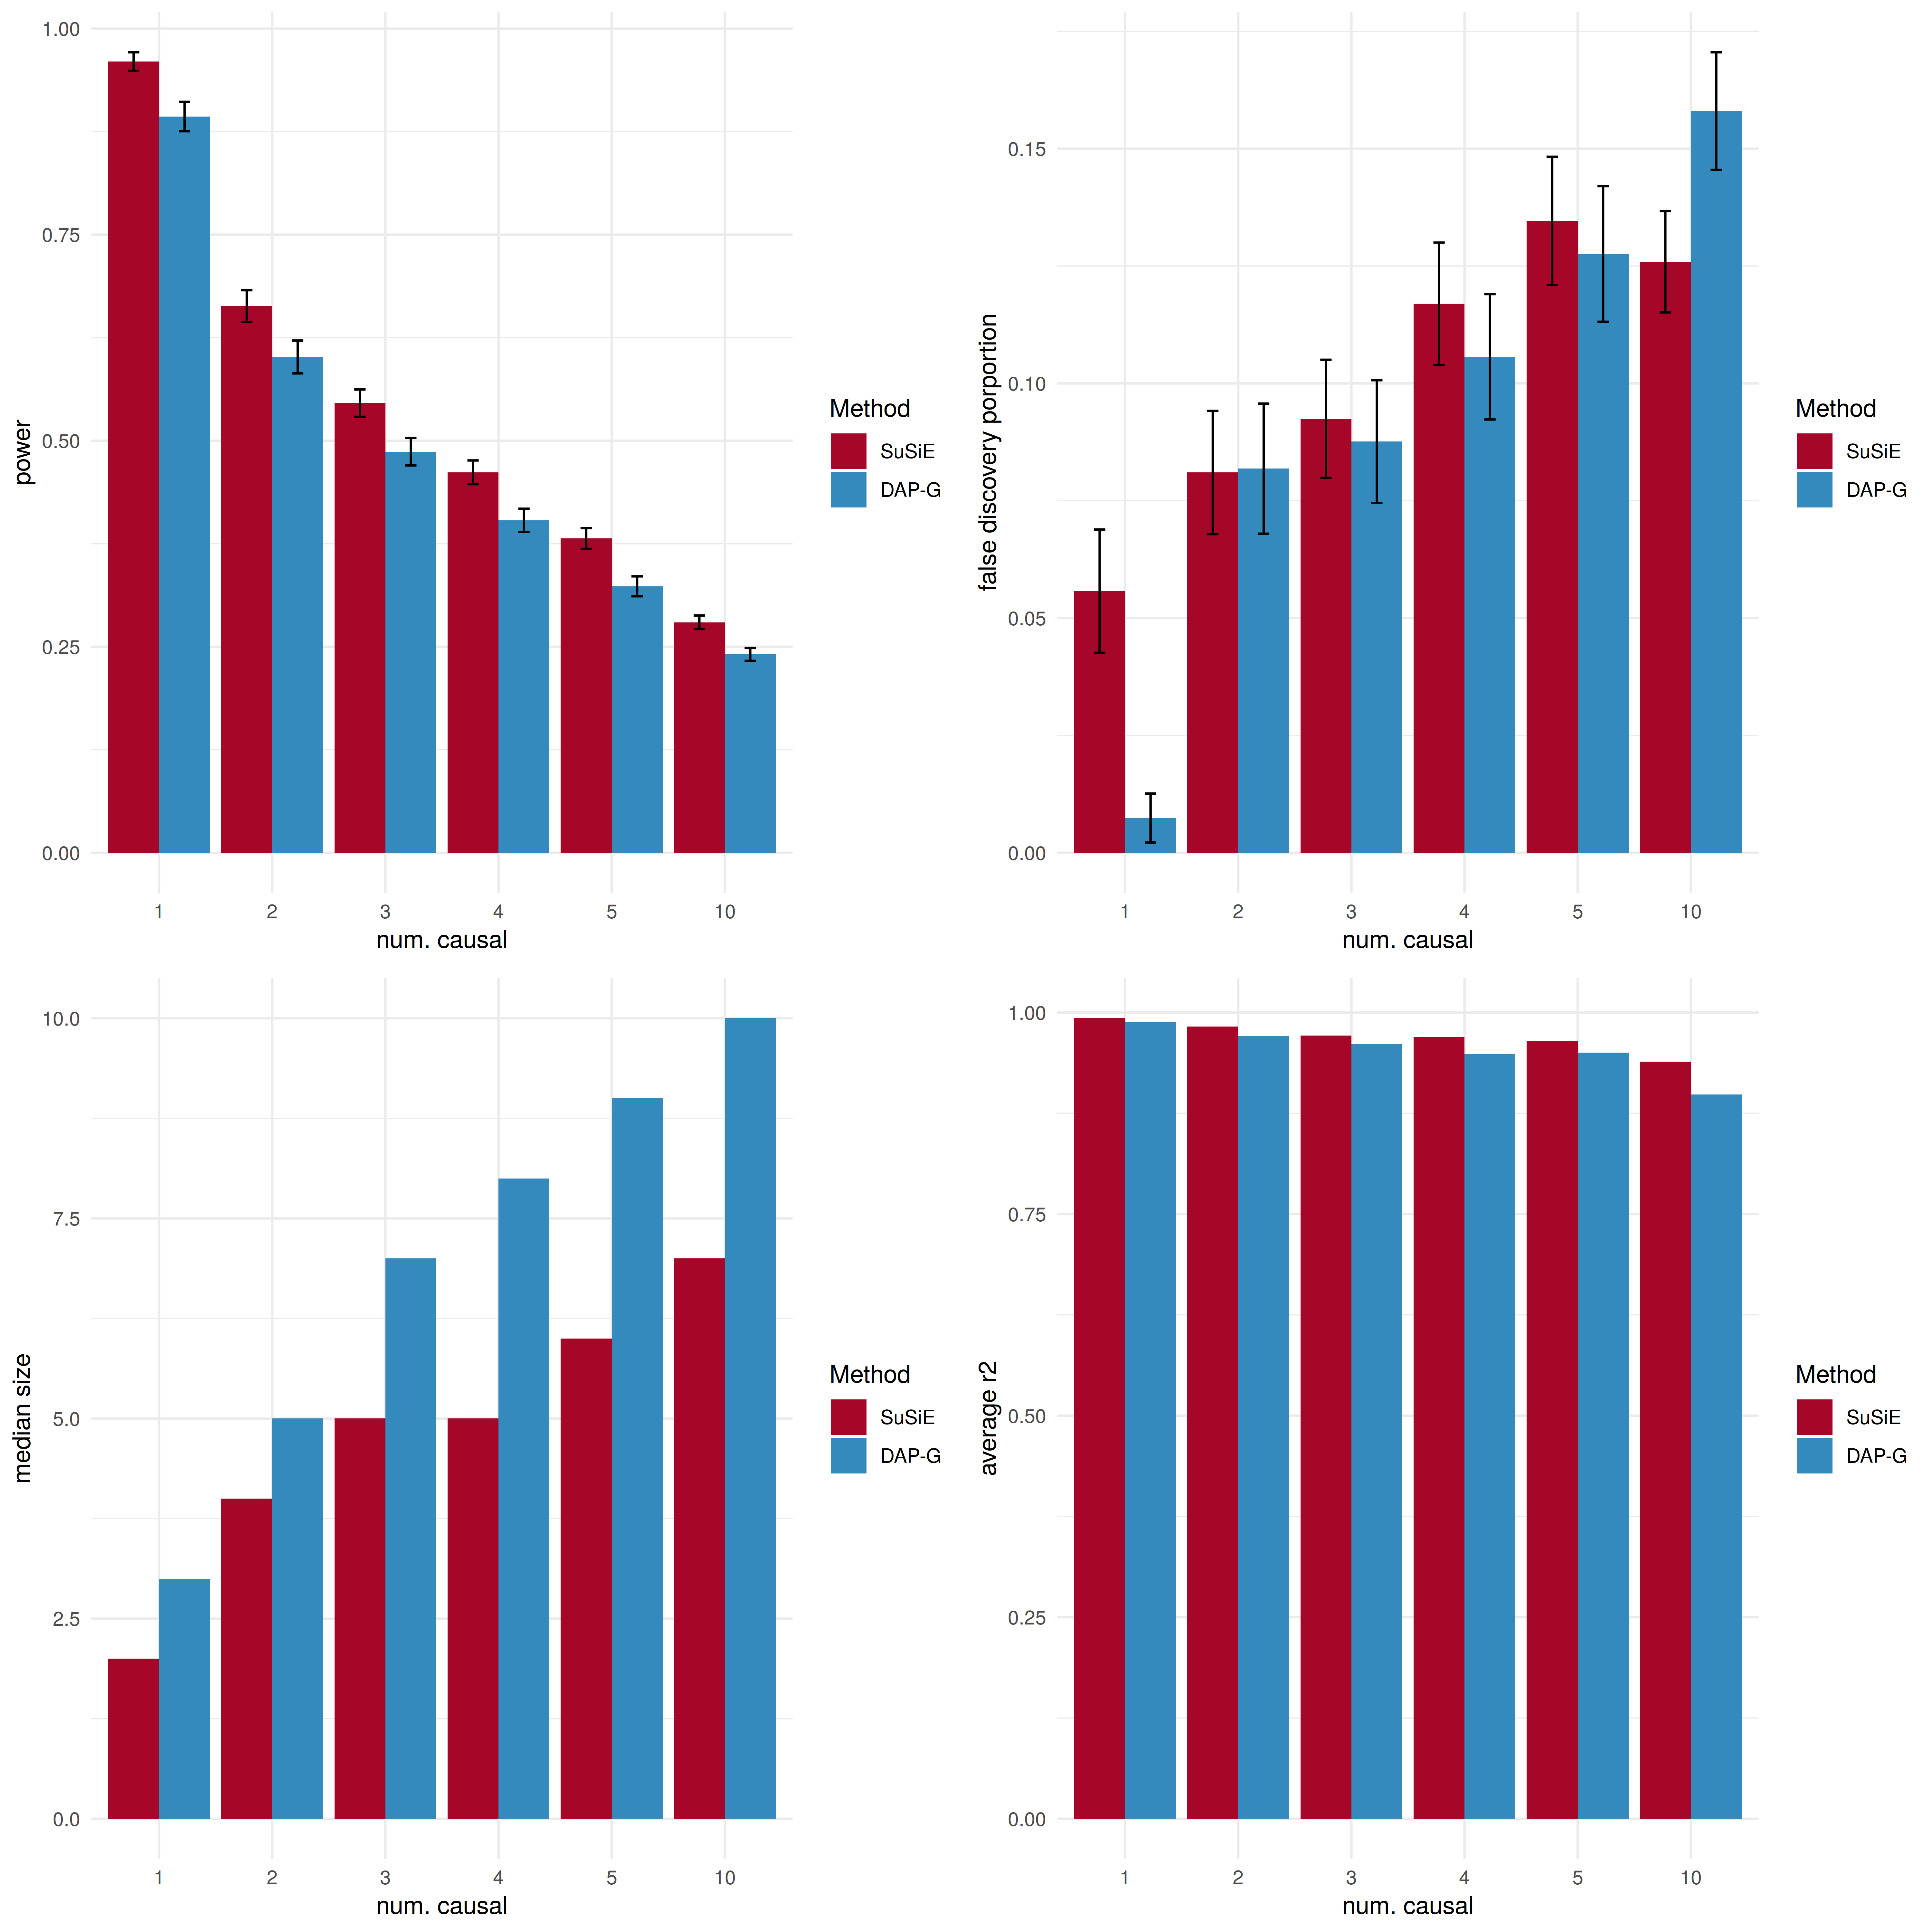

In [7]:
%preview susie_comparison/cs_eval/cs_comparison.png

## Figure S1 & S2: PIP comparison

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb pip
```

### Result

SuSiE vs DAP-G

%preview susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_dap.png

> susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_dap.png (126.1 KiB):

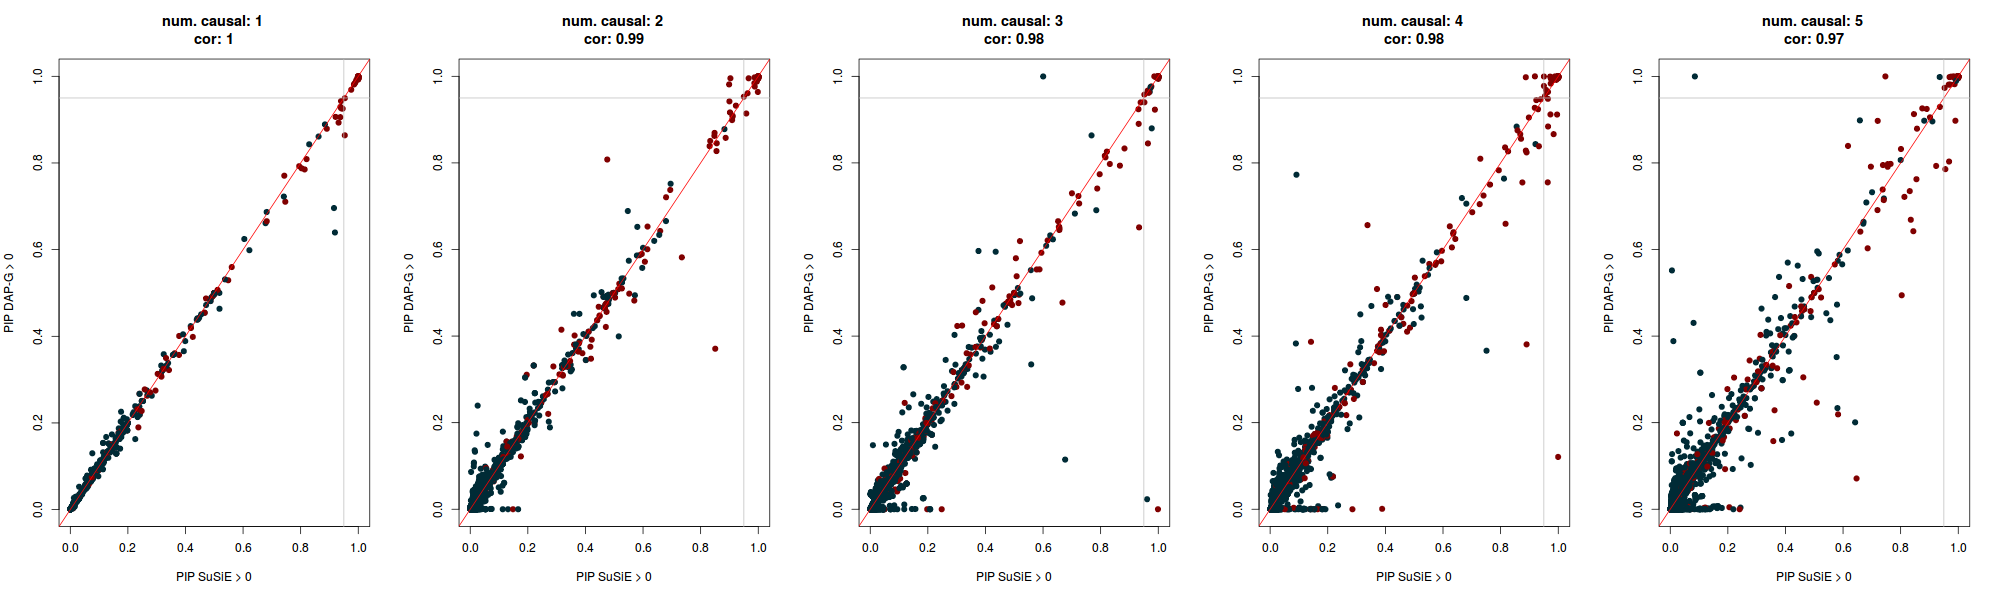

In [8]:
%preview susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_dap.png

SuSiE vs CAVIAR

%preview susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_caviar.png

> susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_caviar.png (111.3 KiB):

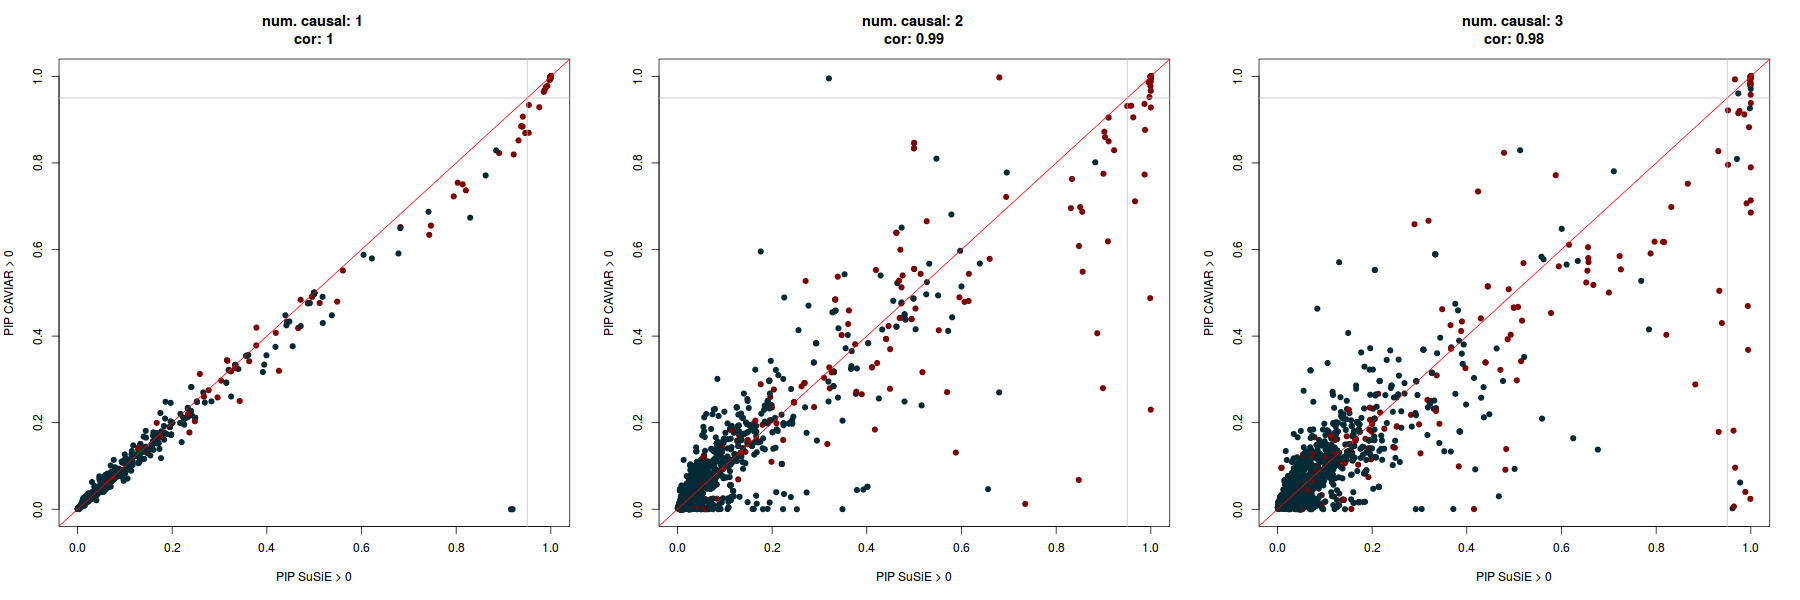

In [9]:
%preview susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_caviar.png

SuSiE vs FINEMAP

%preview ~/GIT/github/mvarbvs/dsc/susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_finemap.png

> /home/gaow/GIT/github/mvarbvs/dsc/susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_finemap.png (109.7 KiB):

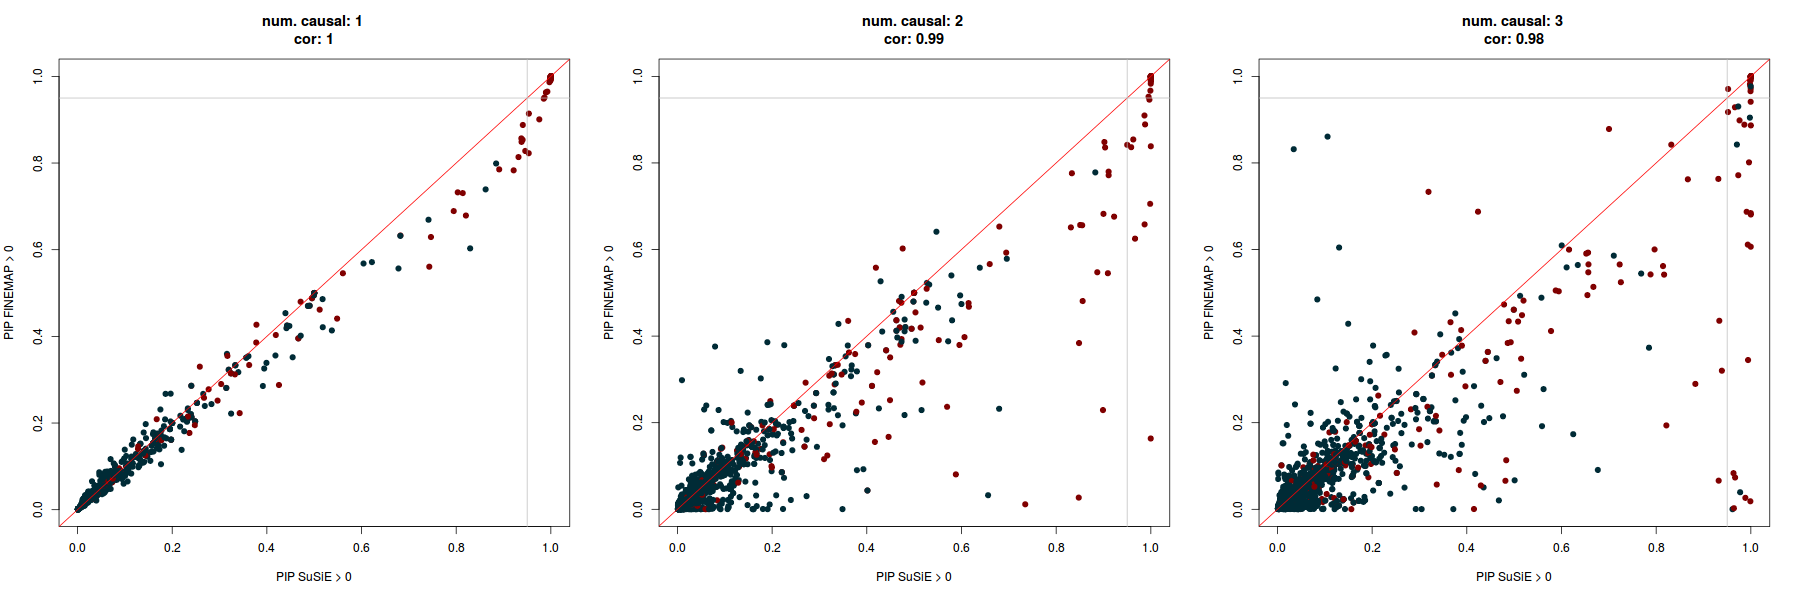

In [10]:
%preview ~/GIT/github/mvarbvs/dsc/susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.susie_vs_finemap.png

DAP vs CAVIAR

%preview susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.dap_vs_caviar.png

> susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.dap_vs_caviar.png (111.9 KiB):

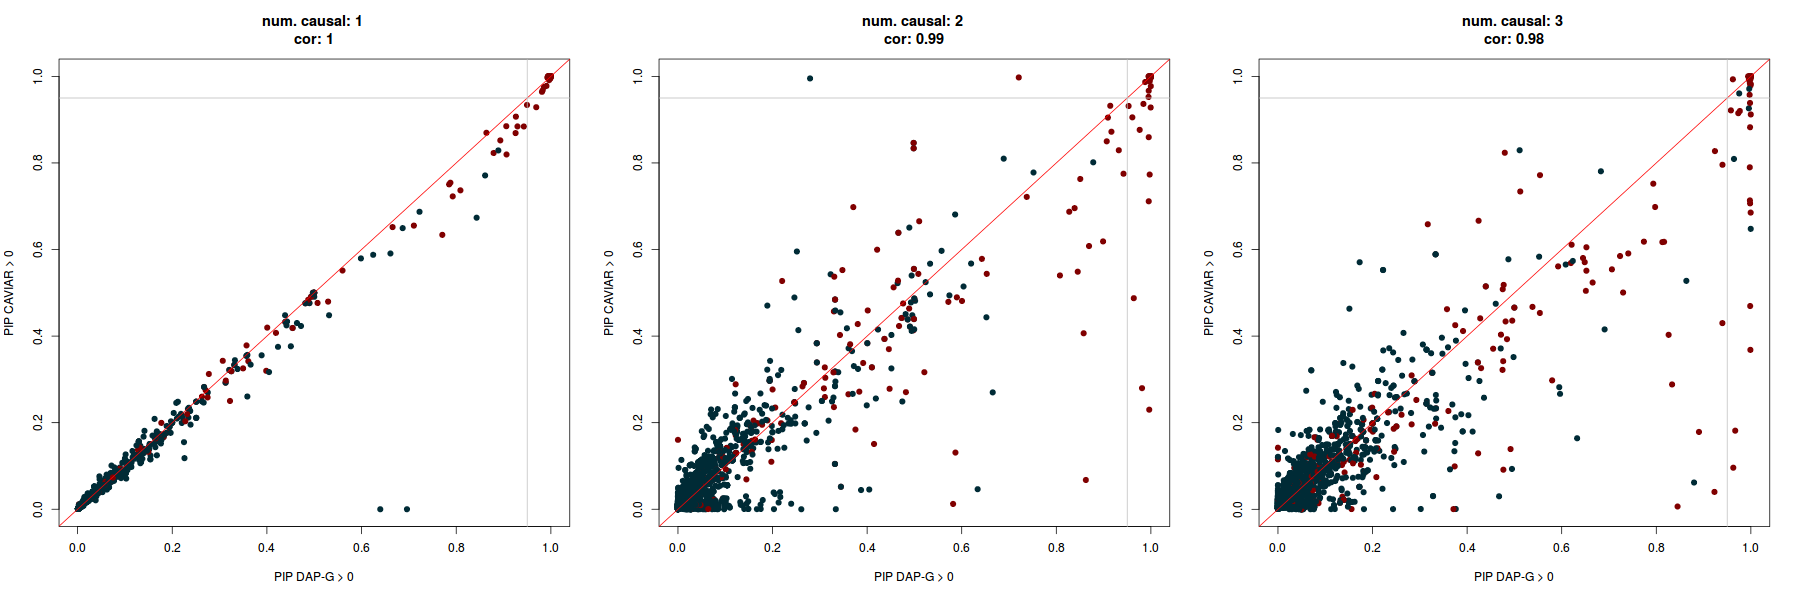

In [11]:
%preview susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.dap_vs_caviar.png

DAP vs FINEMAP

%preview susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.dap_vs_finemap.png

> susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.dap_vs_finemap.png (109.6 KiB):

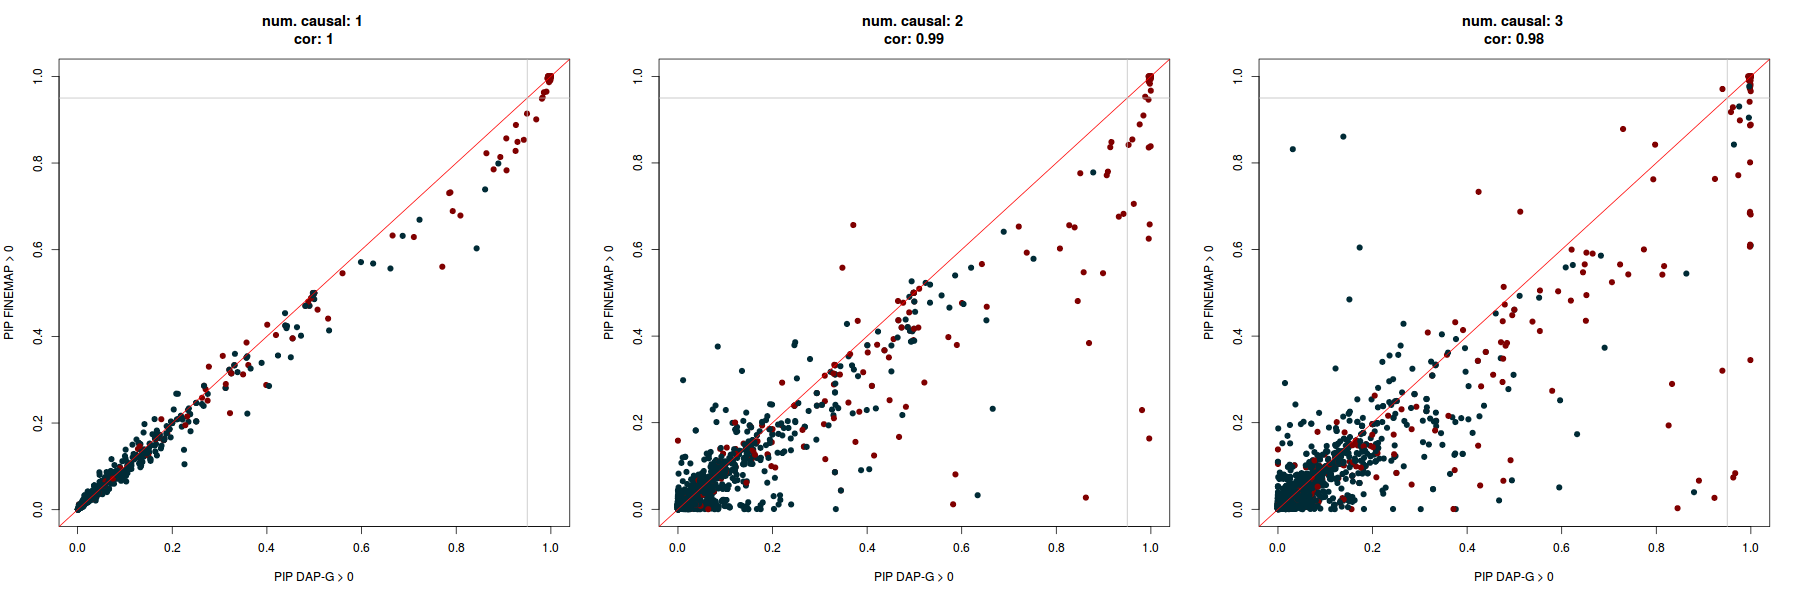

In [12]:
%preview susie_comparison/PIP_comparison_0722_estvar_true_filter_true_0p5.dap_vs_finemap.png

To consolidate these figures:

In [13]:
cd ~/GIT/github/mvarbvs/dsc/susie_comparison
d=0722
convert -append PIP_comparison_"$d"_estvar_true_filter_true_0p5.susie_vs_dap.png PIP_comparison_"$d"_estvar_true_filter_true_0p5.susie_vs_caviar.png PIP_comparison_"$d"_estvar_true_filter_true_0p5.susie_vs_finemap.png PIP_comparison_"$d"_susie_vs_others.png
convert -append PIP_comparison_"$d"_estvar_true_filter_true_0p5.dap_vs_caviar.png PIP_comparison_"$d"_estvar_true_filter_true_0p5.dap_vs_finemap.png PIP_comparison_"$d"_estvar_true_filter_true_0p5.caviar_vs_finemap.png PIP_comparison_"$d"_others.png

## Figure S3

### Command

```
sos run analysis/20180620_Purity_Plot_Lite.ipynb ld
```

### Result

%preview susie_comparison/ld_0622.png

> susie_comparison/ld_0622.png (93.0 KiB):

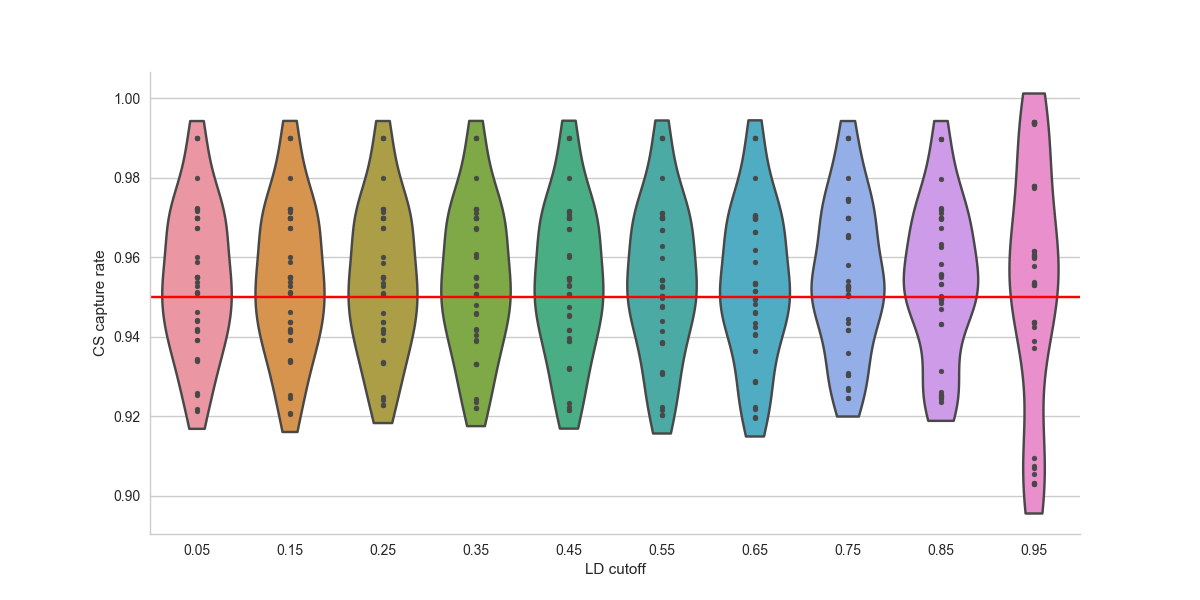

In [14]:
%preview susie_comparison/ld_0622.png

## Figure S5

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb coverage
```

### Result

%preview susie_comparison/Coverage_0722.png

> susie_comparison/Coverage_0722.png (193.9 KiB):

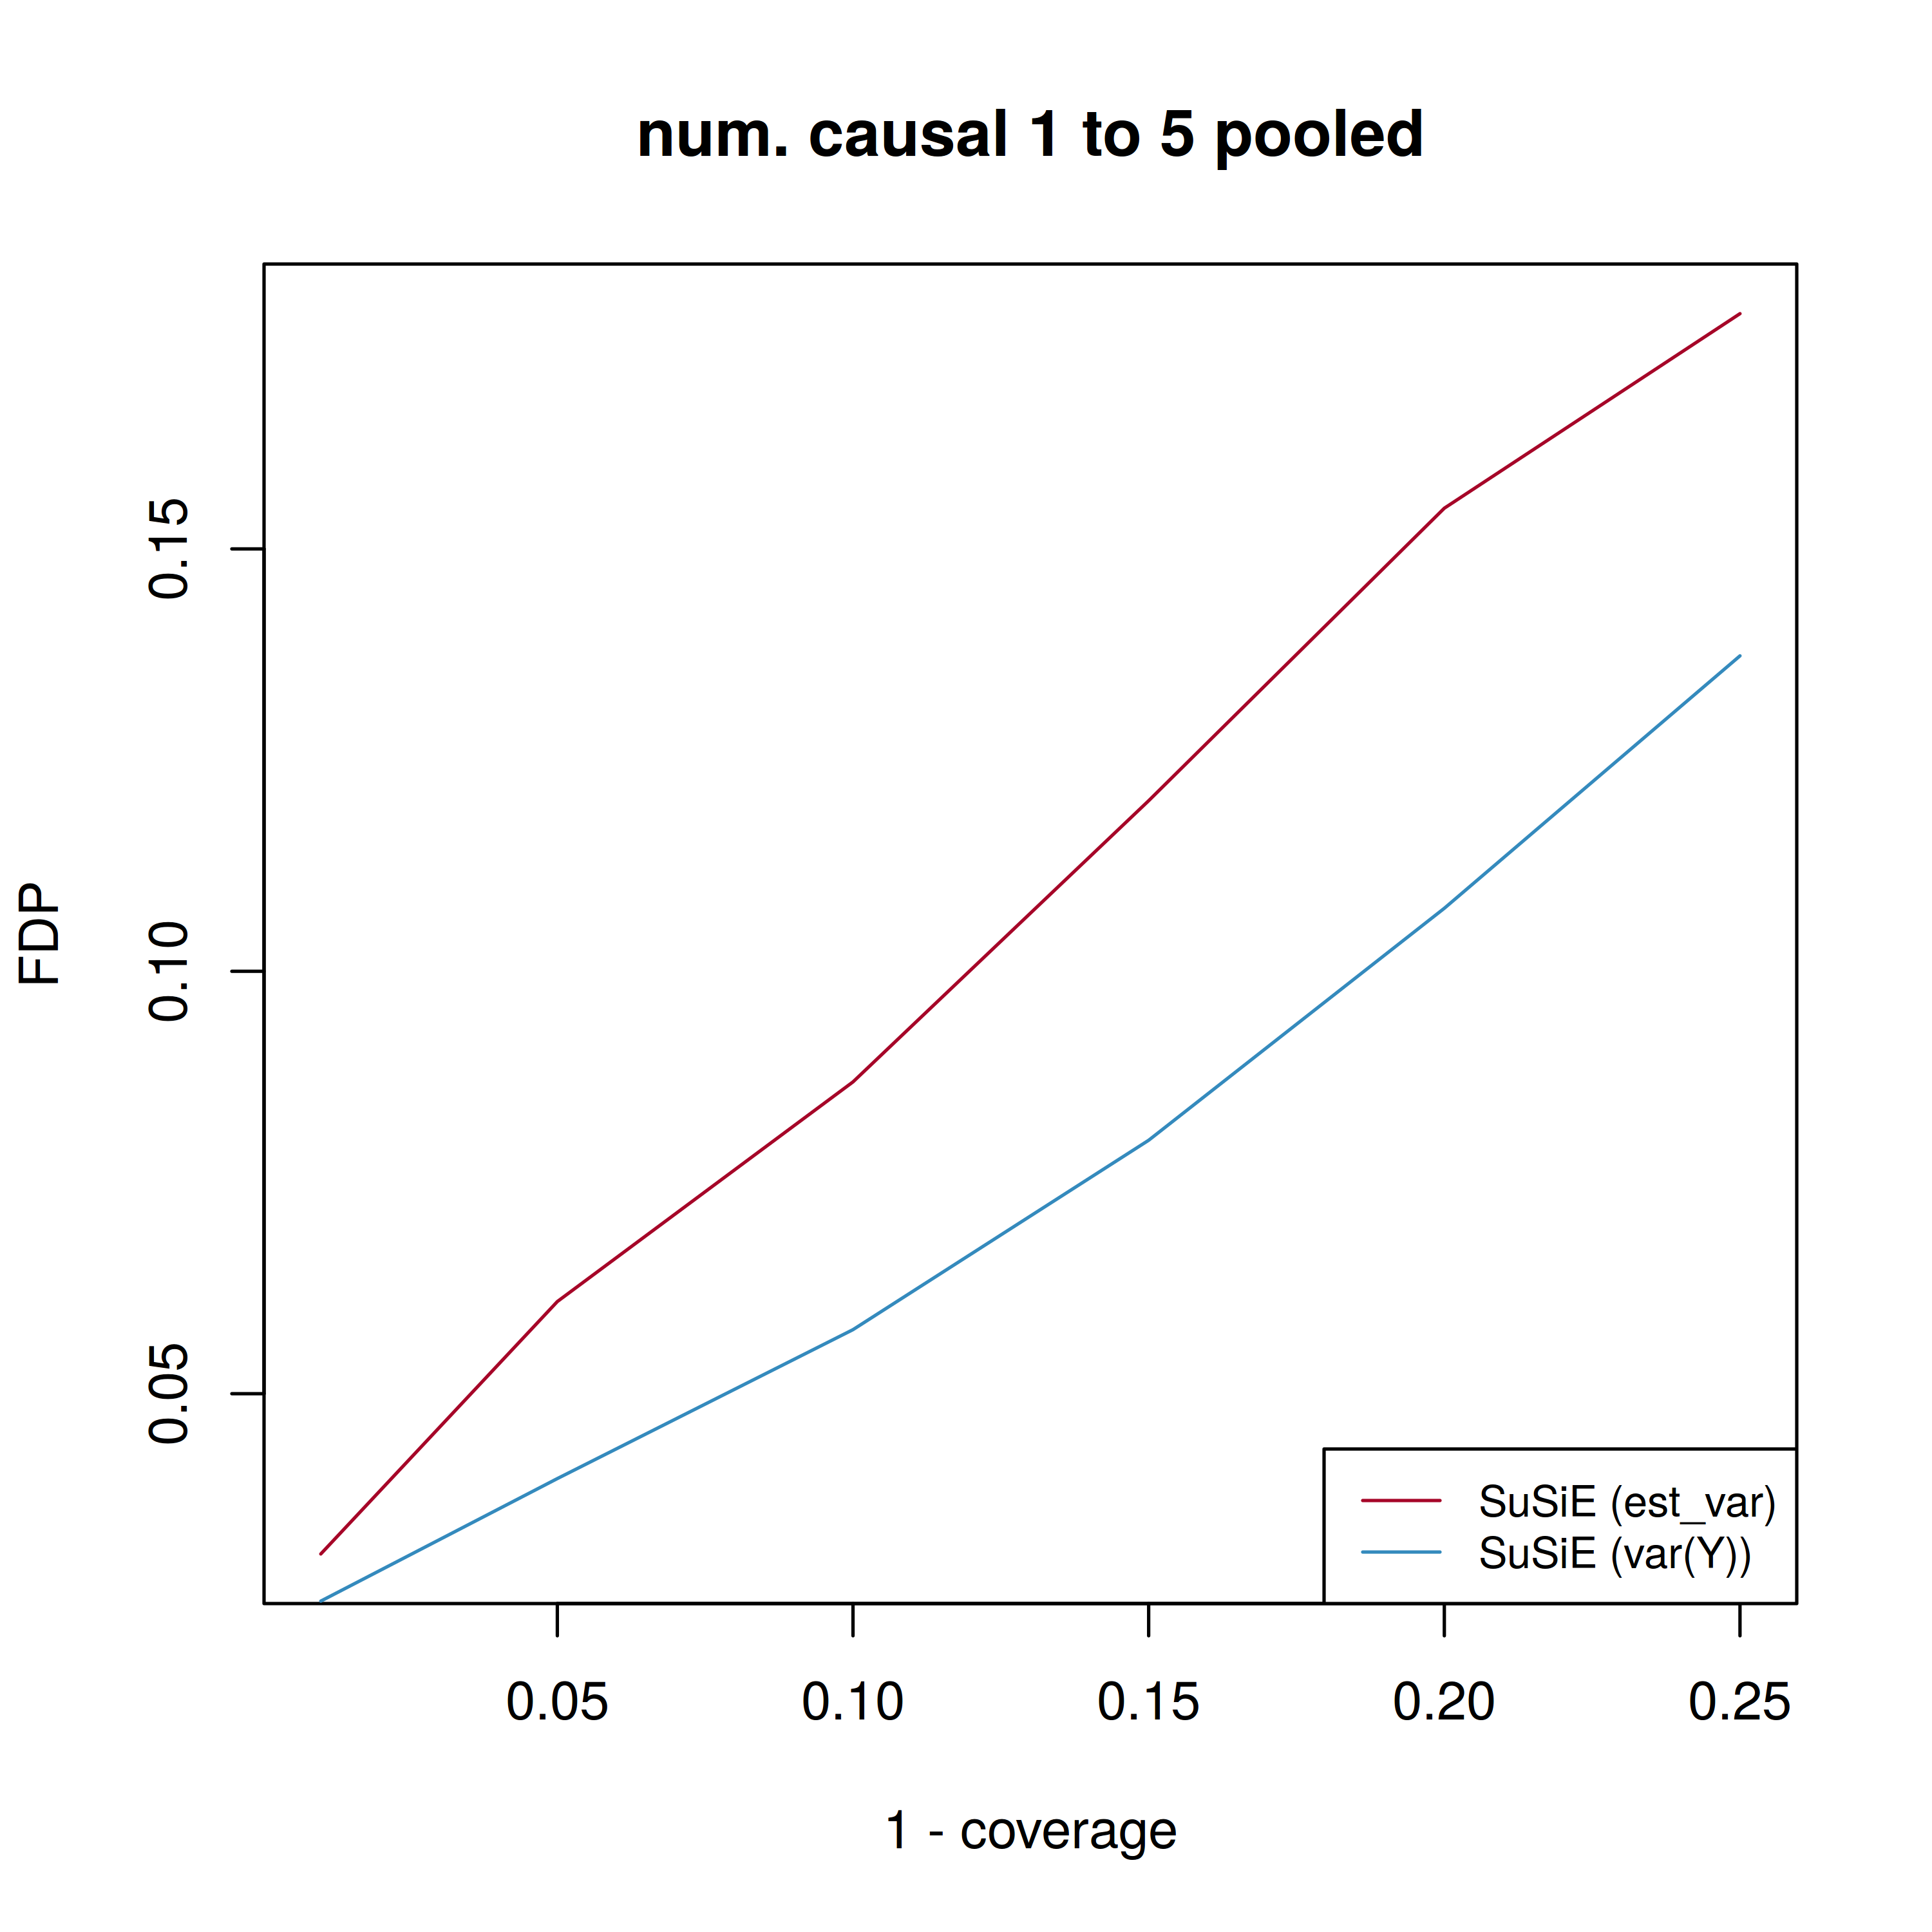

In [15]:
%preview susie_comparison/Coverage_0722.png

## Table S1: Speed comparison

### Command

```
sos run analysis/20180630_Runtime.ipynb speed
```

### Result

Note: this result is based on runs in a cluster environment -- each job is submitted to a cluster node at random with different hardware configurations, thus difficult to describe the setup. In the manuscript we published result from a single desktop machine running part of the benchmark, with a description of the machine's hardware setup.

In [1]:
dat = readRDS('susie_comparison/speed_comparison_0722_estvar_true.rds')
t(apply(dat, 2, function(x) c(mean(x), min(x), max(x))))

SuSiE,0.6674567,0.32450,1.920500
DAP,2.8673505,2.22586,8.874461
FINEMAP,23.0167067,10.99400,48.163000
CAVIAR,2907.5096733,2637.33900,3018.519000


%preview susie_comparison/speed_comparison_0722_estvar_true.png

> susie_comparison/speed_comparison_0722_estvar_true.png (10.5 KiB):

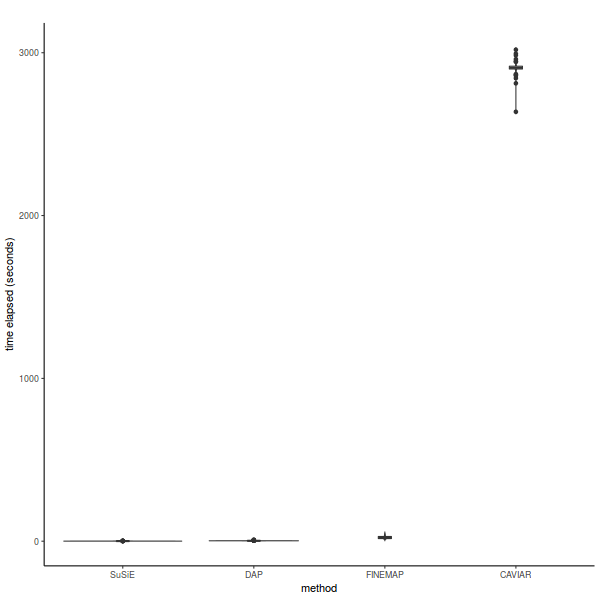

In [2]:
%preview susie_comparison/speed_comparison_0722_estvar_true.png